In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import os
import seaborn as sns
from hmmlearn import hmm

In [2]:
file_list = os.listdir()
text = ''

for file in file_list:
    if file.startswith('tom_'):
        with open(file, 'r') as f:
            text += re.sub('[^а-яё]', '', f.read().lower())

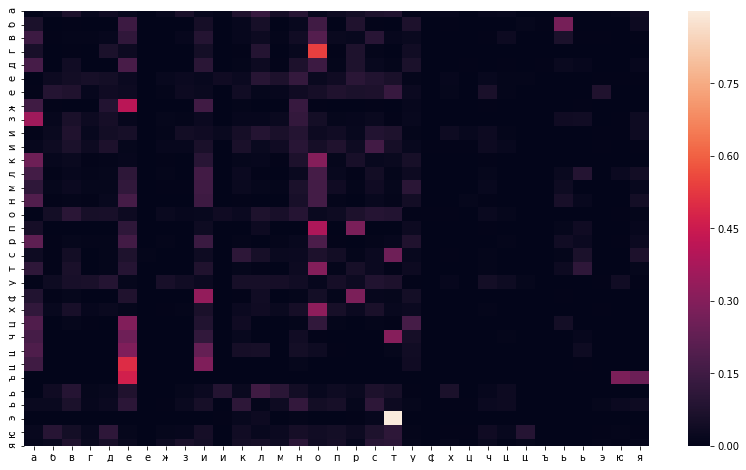

In [3]:
RUS = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя'
POS = {l: i for i, l in enumerate(RUS)}

probabilities = np.zeros((len(RUS), len(RUS)))

for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]]+=1
    
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

df = pd.DataFrame(probabilities, index=(c for c in RUS), columns=(c for c in RUS))
plt.figure(figsize=(14,8))
sns.heatmap(df)
_ = plt.show()

In [4]:
start = 'п'
end = 'р'
prior = 1. / len(RUS)
proba = 0

for cp in RUS:
    for cn in RUS:
        proba += prior * probabilities[POS[start], POS[cp]] * probabilities[POS[cp], POS[cn]] * probabilities[POS[cn], POS[end]]
        
if proba > 0:
    print(f"Вероятность последовательности 'п**р' равна {proba:6f}")

Вероятность последовательности 'п**р' равна 0.001293


In [5]:
word = ['б']
length = 8

for i in range(length-1):
    index = POS[word[i]]
    next_char = np.random.choice(list(RUS), p=probabilities[index])
    word.append(next_char)

print (''.join(word))

бытьдоец


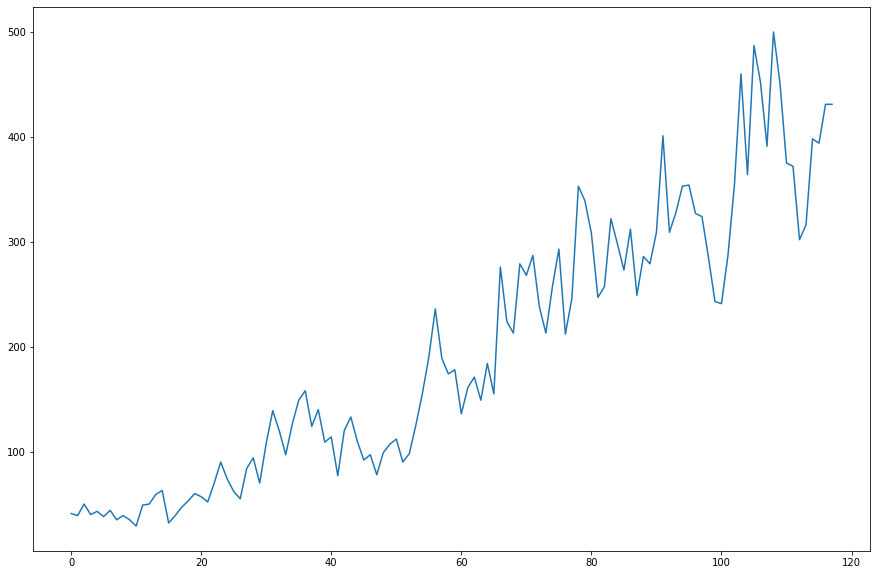

In [6]:
series = pd.read_csv('../015 Временные ряды, общая теория/Series/monthly-boston-armed-robberies-j.csv')['Count']
series = series.dropna()
plt.figure(figsize=(15,10))
_ = plt.plot(series)

In [7]:
values = series.values.reshape(-1,1)

In [8]:
for n in range(1, 10):
    model = hmm.GaussianHMM(n_components=n, covariance_type="diag", n_iter=1000)
    model.fit(values)
    print (n, model.score(values))

1 -739.512376545524
2 -652.7824661820224
3 -629.4670322744707
4 -593.963046527364
5 -577.8704295424799
6 -571.3182247583837
7 -561.129721798887
8 -559.5150499453412
9 -554.9655051223996


In [9]:
def chart(n):
    model = hmm.GaussianHMM(n_components=10, covariance_type="diag", n_iter=1000)
    model.fit(values)
    labels = model.predict(values)
    means = np.zeros_like(values)
    
    for i in range(model.n_components):
        means[labels == i] = model.means_[i]
        
    return means

Fitting a model with 119 free scalar parameters with only 118 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 118 data points will result in a degenerate solution.
Fitting a model with 119 free scalar parameters with only 118 data points will result in a degenerate solution.


Text(0.5, 1.0, 'n_components = 100')

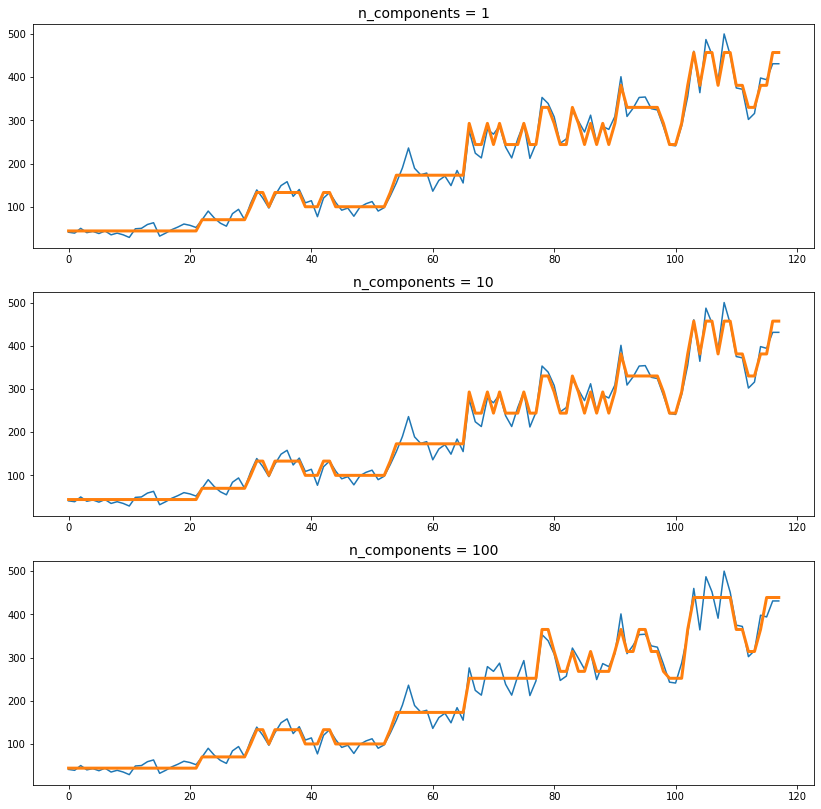

In [10]:
figure, ax = plt.subplots(3, 1, figsize=(14, 14))
ax[0].plot(values)
ax[0].plot(chart(1), linewidth=3)
ax[0].set_title('n_components = 1', fontsize=14)
ax[1].plot(values)
ax[1].plot(chart(10), linewidth=3)
ax[1].set_title('n_components = 10', fontsize=14)
ax[2].plot(values)
ax[2].plot(chart(100), linewidth=3)
ax[2].set_title('n_components = 100', fontsize=14)